<a href="https://colab.research.google.com/github/tracydo99/bus118/blob/main/Lab_3_ML_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Generate sample data
data = {
'square_footage': [800, 1300, 1800, 1400, 2200, 1700, 2500, 2100, 1600, 2400],
'location': ['Downtown', 'Willow Glen', 'South San Jose', 'East San Jose', 'Almaden Valley', 'North San Jose', 'Cambrian Park', 'Willow Glen', 'South San Jose', 'Almaden Valley'],
'price': [950000, 1700000, 1100000, 1250000, 2300000, 1650000, 1900000, 1750000, 1150000, 2250000]
}
df = pd.DataFrame(data)

# Features and target
X = df[['square_footage', 'location']]
y = df['price']

# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
transformers=[
('location', OneHotEncoder(sparse_output=False), ['location'])
], remainder='passthrough')

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train model
model.fit(X_train, y_train)

# Make prediction for a new house: 2000 sq ft in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['Downtown']})
predicted_price = model.predict(new_house)
print((f"Predicted price for a 2000 sq ft house in Downtown: $"
f"{predicted_price[0]:,.2f}"))

# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['location']
.get_feature_names_out(['location'])).tolist() + \
['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Predicted price for a 2000 sq ft house in Downtown: $650,000.00

Model Coefficients:
location_Almaden Valley: 846428.57
location_Cambrian Park: 521428.57
location_Downtown: -853571.43
location_East San Jose: -403571.43
location_North San Jose: 71428.57
location_South San Jose: -453571.43
location_Willow Glen: 271428.57
square_footage: -250.00


I used ChatGPT to gather accurate/realistic data from Zillow and Redfin of neighborhoods in San Jose.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Generate sample customer data
data = {
    'age': [22, 31, 49, 27, 58, 39, 44, 26, 51, 35, 42, 30],
    'monthly_usage_hours': [8, 44, 18, 12, 66, 28, 23, 10, 59, 38, 20, 33],
    'purchase_amount': [75, 240, 140, 95, 320, 210, 165, 85, 290, 205, 155, 180],
    'customer_service_calls': [6, 2, 7, 4, 1, 3, 5, 5, 0, 2, 4, 3],
    'region': ['West', 'South', 'East', 'North', 'South', 'West', 'East', 'North', 'South', 'North', 'West', 'East'],
    # 1 = churned, 0 = not churned
    'churn': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

# Features and target
X = df[['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls', 'region']]
y = df['churn']

# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), ['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']),
    ('cat', OneHotEncoder(sparse_output=False), ['region'])
])

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict churn probability for a new customer
new_customer = pd.DataFrame({'age': [30], 'monthly_usage_hours': [20], 'purchase_amount': [150], 'customer_service_calls': [3], 'region': ['North']})
churn_probability = model.predict_proba(new_customer)[0][1] #Probability of churn

# Classify based on threshold (0.5)
threshold = 0.5
churn_prediction = int(churn_probability > threshold)
print(f"Churn Probability for new customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")

# Display model coefficients
num_feature_names = ['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']
cat_feature_names = (
    model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(['region'])
         .tolist()
)
feature_names_ordered = num_feature_names + cat_feature_names
coefficients = model.named_steps['classifier'].coef_[0]

print("\nModel Coefficients:")
for feature, coef in zip(feature_names_ordered, coefficients):
    print(f"{feature}: {coef:.3f}")

print(f"\nIntercept: {model.named_steps['classifier'].intercept_[0]:.3f}")

Churn Probability for new customer: 0.57
Churn Prediction (1 = churn, 0 = no churn): 1

Model Coefficients:
age: 0.164
monthly_usage_hours: -0.666
purchase_amount: -0.729
customer_service_calls: 0.825
region_East: 0.087
region_North: 0.314
region_South: -0.137
region_West: -0.264

Intercept: -0.610


I used ChatGPT to generate a longer dataset for the purpose of this assignment. The numbers were chosen to look realistic so the churn labels could be assigned based on plausible patterns.

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample customer data
data = {
'annual_spending': [500, 1200, 300, 1500, 800, 200, 1000, 600, 1300, 400, 1800, 750, 220, 950, 1400, 1700, 450, 1250, 700, 1600],
'purchase_frequency': [5, 12, 3, 15, 8, 2, 10, 6, 13, 4, 16, 7, 2, 9, 11, 14, 5, 12, 8, 15],
'age': [25, 34, 45, 28, 52, 36, 41, 29, 47, 33, 30, 39, 50, 27, 44, 38, 55, 31, 42, 29],
'region': ['North', 'South', 'West', 'East', 'South', 'North', 'West', 'East', 'South', 'North', 'West', 'East', 'South', 'North', 'West', 'South', 'East', 'North', 'South', 'West']
}
df = pd.DataFrame(data)

# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.close()

# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)

# Example of targeted strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Strategy:")
    if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
        print(("High-spending customers: Offer exclusive promotions or loyalty rewards."))
    elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
        print("Frequent buyers: Provide bulk discounts or subscription plans.")
    else:
        print(("Low-engagement customers: Send personalized re-engagement campaigns."))

# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0                 566.67                5.50  31.50
1                1416.67               13.11  35.78
2                 494.00                5.20  48.80

Cluster 0 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

Cluster 1 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 2 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.


I used ChatGPT to expand the original dataset given, as more rows allow K-means to form clearer clusters and improve segmentation.

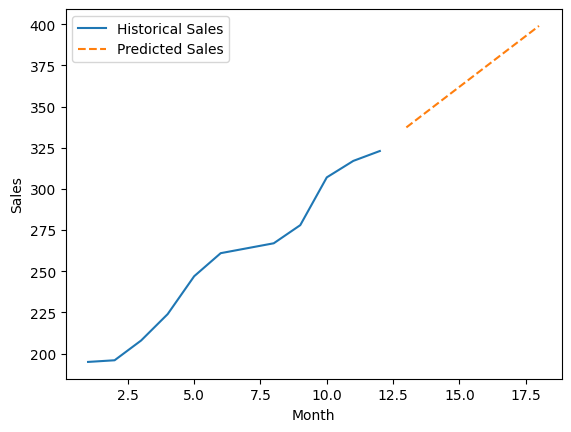

In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sales_data.csv')  # Ensure columns: 'month', 'sales'
X = df[['month']]
y = df['sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for next 6 months
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})
predictions = model.predict(future_months)

# Plot results
plt.plot(df['month'], y, label='Historical Sales')
plt.plot(future_months['month'], predictions, label='Predicted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()